In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22622 sha256=9437e051f6ccb886a298e8c8dd8574e7edc54cba5c6c7f21c5590364c5559df8
  Stored in directory: C:\Users\Walvi\AppData\Local\Temp\pip-ephem-wheel-cache-mf1u99d7\wheels\b4\c3\39\9c01ae2b4726f37024bba5592bec868b47a2fab5a786e8979a
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8372 sha256=e79e0a951b82d866f27af1e4a3c422a647ed2d172ae60c0535d03922e4f427df
  Stored in directory: C:\Users\Walvi\AppData\Local\Temp\pip-ephem-wheel-cache-mf1u99d7\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
!pip install git+https://github.com/quantopian/pyfolio

  Cloning https://github.com/quantopian/pyfolio to c:\users\walvi\appdata\local\temp\pip-req-build-9unyte30
Processing c:\users\walvi\appdata\local\pip\cache\wheels\ea\b2\c8\6769d8444d2f2e608fae2641833110668d0ffd1abeb2e9f3fc\empyrical-0.5.5-cp38-none-any.whl
  Using cached pandas_datareader-0.9.0-py3-none-any.whl (107 kB)
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=76264 sha256=01db2b78ae1f139f12b55b39422e70317fbac30ec33f6686f215fcc3b0db9025
  Stored in directory: C:\Users\Walvi\AppData\Local\Temp\pip-ephem-wheel-cache-x66lhu1n\wheels\03\00\1c\647b2b1a87981bb9ce79040685d203386303338628a36992f3
Successfully built pyfolio


In [4]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

# 2. Obtendo e tratando os dados

In [5]:
#tickers = ["ABEV3.SA", "ITSA4.SA", "WEGE3.SA", "USIM5.SA", "VALE3.SA", '^BVSP']
#dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]

tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [6]:
dados_yahoo

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-12-23,16.115248,4.170419,1.503426,11.309156,10.872849,44015.0
2015-12-28,16.062120,4.158505,1.532524,10.812992,11.019742,43764.0
2015-12-29,16.115248,4.158505,1.503426,10.881427,10.893843,43654.0
2015-12-30,15.805341,4.098920,1.503426,11.146619,10.453350,43350.0
2016-01-04,15.238648,3.932108,1.416130,10.855763,10.236556,42141.0
...,...,...,...,...,...,...
2020-12-17,16.059999,11.670000,13.710000,87.199997,75.731995,118157.0
2020-12-18,15.990000,11.640000,14.450000,88.190002,73.493118,117679.0
2020-12-21,15.420000,11.380000,14.240000,86.860001,72.010002,116016.0


In [7]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-12-23,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-28,-0.003297,-0.002857,0.019355,-0.043873,0.013510,-0.005703
2015-12-29,0.003308,0.000000,-0.018987,0.006329,-0.011425,-0.002513
2015-12-30,-0.019231,-0.014328,0.000000,0.024371,-0.040435,-0.006964
2016-01-04,-0.035854,-0.040697,-0.058064,-0.026094,-0.020739,-0.027889
...,...,...,...,...,...,...
2020-12-17,0.015171,0.000858,-0.007959,0.011366,0.033697,0.001780
2020-12-18,-0.004359,-0.002571,0.053975,0.011353,-0.029563,-0.004045
2020-12-21,-0.035647,-0.022337,-0.014533,-0.015081,-0.020180,-0.014132


In [8]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-12-23,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-12-28,0.996703,0.997143,1.019355,0.956127,1.013510,0.994297
2015-12-29,1.000000,0.997143,1.000000,0.962178,1.001931,0.991798
2015-12-30,0.980769,0.982856,1.000000,0.985628,0.961418,0.984892
2016-01-04,0.945604,0.942857,0.941936,0.959909,0.941479,0.957424
...,...,...,...,...,...,...
2020-12-17,0.996572,2.798280,9.119174,7.710566,6.965240,2.684471
2020-12-18,0.992228,2.791086,9.611383,7.798106,6.759325,2.673611
2020-12-21,0.956858,2.728742,9.471702,7.680502,6.622920,2.635829


In [9]:
carteira = 100 * retorno_acumulado.iloc[:, :5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,
2015-12-23,100.000000,100.000000,100.000000,100.000000,100.000000,500.000000,NaN
2015-12-28,99.670329,99.714315,101.935496,95.612720,101.351012,498.283873,-0.003432
2015-12-29,100.000000,99.714315,100.000000,96.217847,100.193088,496.125250,-0.004332
2015-12-30,98.076933,98.285560,100.000000,98.562779,96.141780,491.067052,-0.010195
2016-01-04,94.560435,94.285670,94.193550,95.990921,94.147877,473.178454,-0.036428
...,...,...,...,...,...,...,...
2020-12-17,99.657168,279.827985,911.917427,771.056600,696.523956,2758.983137,0.009434
2020-12-18,99.222798,279.108640,961.138338,779.810617,675.932514,2795.212907,0.013132
2020-12-21,95.685777,272.874249,947.170235,768.050219,662.291966,2746.072446,-0.017580


# 3. Resultado

Start date,2015-12-23
End date,2020-12-23
Total months,59
,Backtest
Annual return,41.648%
Cumulative returns,457.766%
Annual volatility,34.688%
Sharpe ratio,1.18
Calmar ratio,0.94
Stability,0.80
Max drawdown,-44.271%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,44.27,2020-01-23,2020-03-23,2020-07-27,133
1,27.08,2018-02-26,2018-06-25,2019-12-12,469
2,19.25,2015-12-23,2016-01-18,2016-03-03,52
3,19.08,2017-02-21,2017-04-13,2017-08-07,120
4,18.61,2016-04-27,2016-06-14,2016-07-22,63


Stress Events,mean,min,max
New Normal,0.16%,-13.80%,13.29%


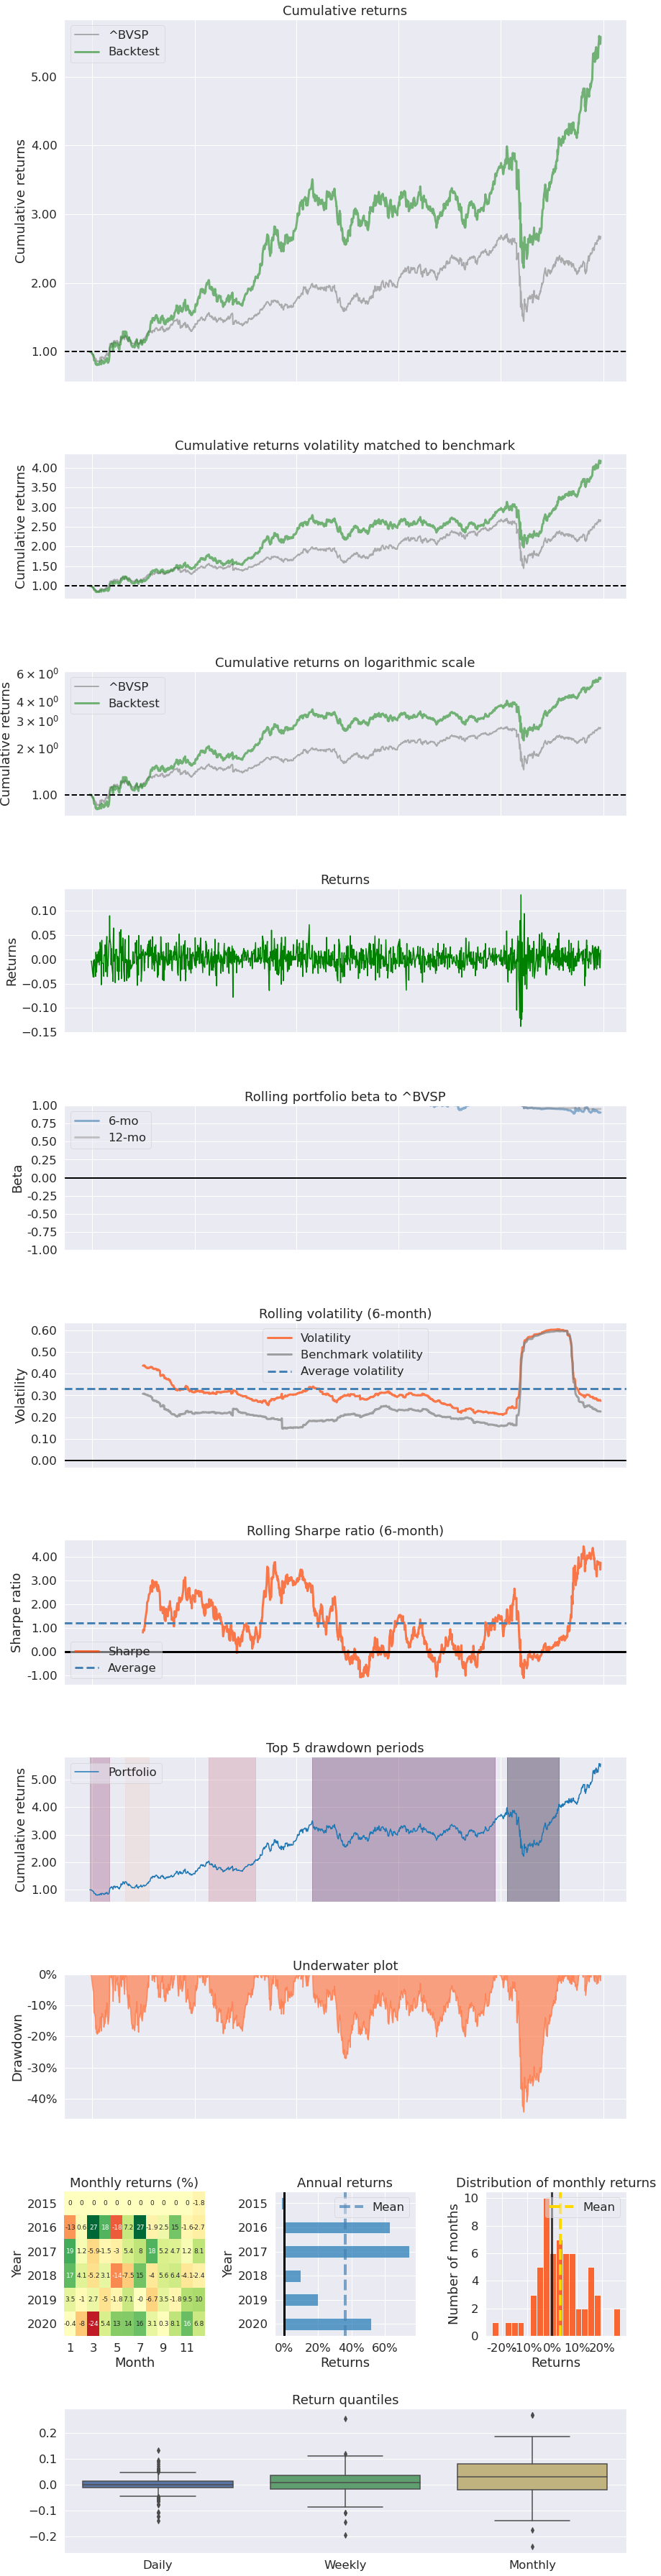

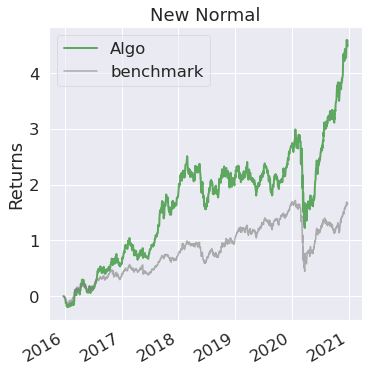

In [10]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])